<a href="https://colab.research.google.com/github/Shahid-codr7/MLW-2-Assignments/blob/master/MLW_II_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-2: MULTI LAYER PERCEPTRON LEARNING

## Name: Shahid Abdul Farhad
## Reg. No.: 2341006002
## Section: 23412C3

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
265,11.8,0.260,0.52,1.80,0.071,6.0,10.0,0.99680,3.20,0.72,10.2,7
1292,5.9,0.395,0.13,2.40,0.056,14.0,28.0,0.99362,3.62,0.67,12.4,6
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5
32,8.3,0.655,0.12,2.30,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5
63,7.0,0.735,0.05,2.00,0.081,13.0,54.0,0.99660,3.39,0.57,9.8,5


In [59]:
df.value_counts(df['quality'])

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


## Performing EDA

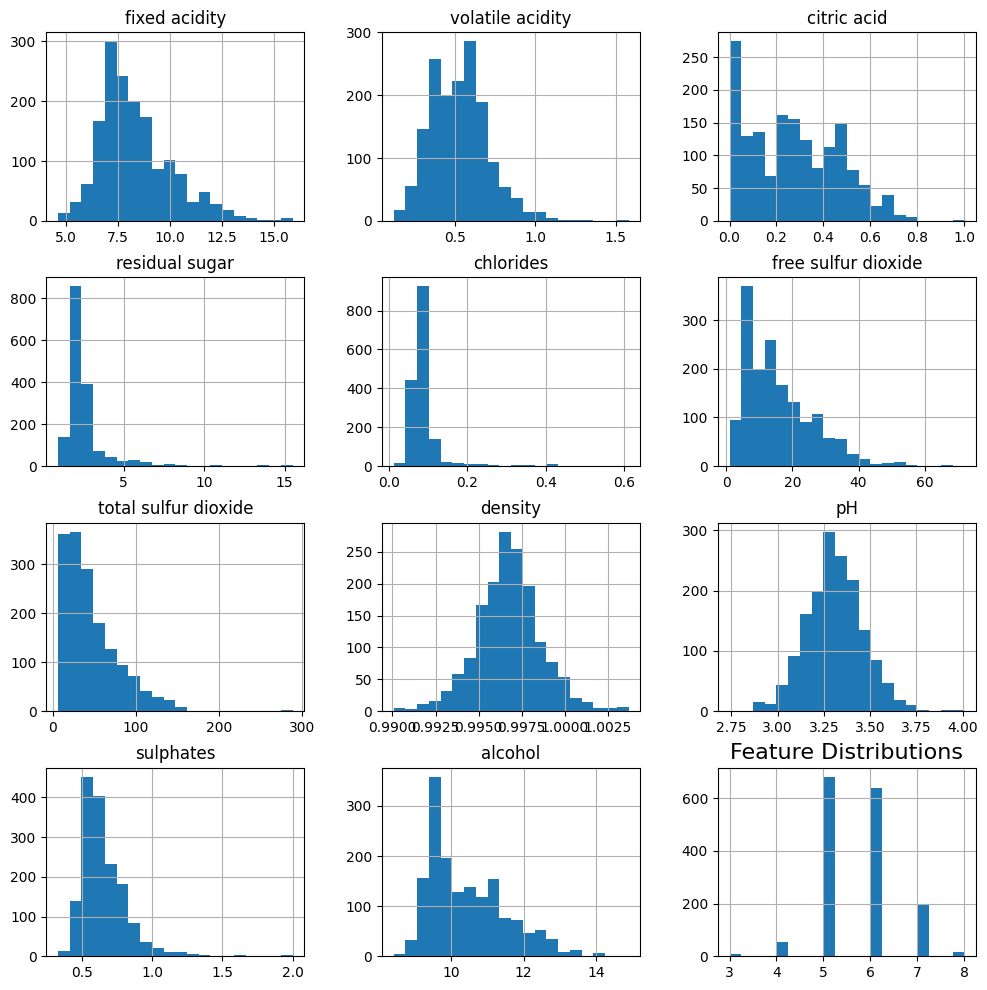

In [60]:
# Plot feature distributions
df.hist(figsize=(12, 12), bins=20)
plt.title("Feature Distributions", fontsize=16)
plt.show()

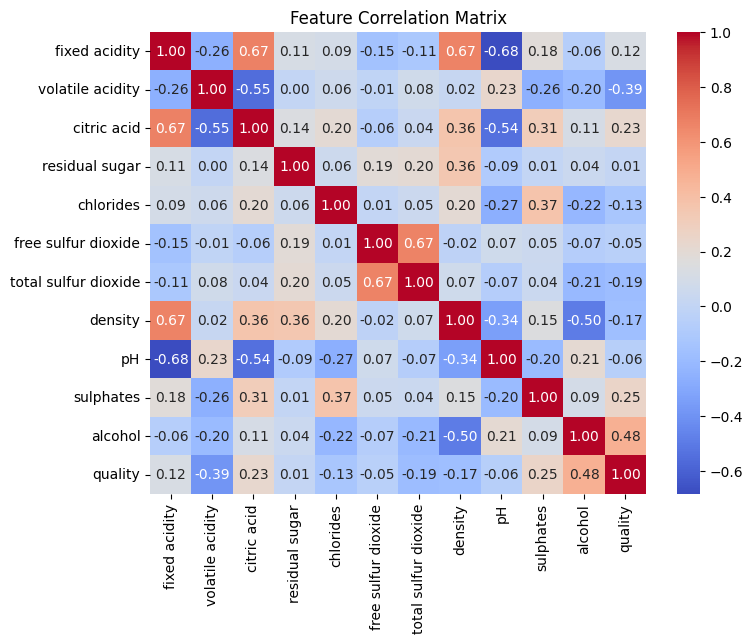

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


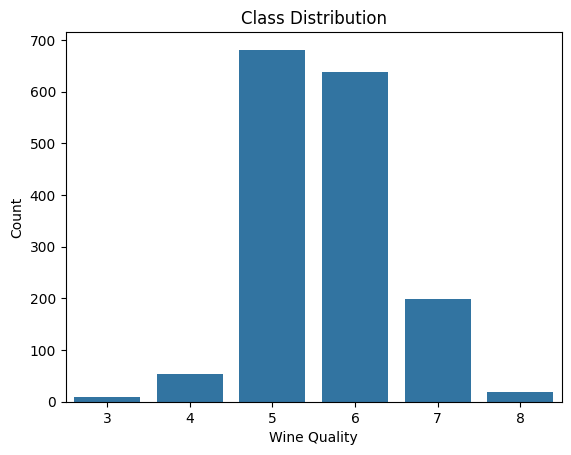

In [62]:
sns.countplot(x=df['quality'])
plt.title("Class Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


## Train Test Splitting

In [63]:
X=df.drop('quality',axis=1)
y=df['quality']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['quality'])

In [65]:
y_train

,quality
1542,6
1558,5
344,6
924,5
971,6
...,...
1056,7
1394,5
337,5
539,5


# Using Standard Scaler and Label Encoder

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-0.94797009,  1.84038456, -1.30310213, ..., -0.05665069,
        -0.58149257,  0.30561112],
       [-0.8299525 ,  0.57378326,  0.28806218, ..., -0.58456494,
        -0.58149257, -0.86781667],
       [ 2.12048734,  0.23602292,  1.16063616, ..., -1.24445776,
         0.65244695,  0.258674  ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.00933859,
        -0.13278729, -0.11682289],
       [ 1.70742577, -0.15803082,  2.3925053 , ..., -0.58456494,
        -0.24496361,  0.72804512],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.14131716,
         0.59635879,  1.4790389 ]])

In [68]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Transform y_test using the same encoder

In [69]:
y_train

,quality
1542,6
1558,5
344,6
924,5
971,6
...,...
1056,7
1394,5
337,5
539,5


In [70]:
y_train_encoded

array([3, 2, 3, ..., 2, 2, 3])

# Build and Train an MLP Classifier using TensorFlow

In [71]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [72]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,566 (13.93 KB)

 Trainable params: 3,566 (13.93 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=1,verbose=1)

In [76]:
history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3304 - loss: 1.9913 - val_accuracy: 0.4969 - val_loss: 1.6024
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4364 - loss: 1.6205 - val_accuracy: 0.5344 - val_loss: 1.4615
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5044 - loss: 1.5065 - val_accuracy: 0.5625 - val_loss: 1.3875
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5265 - loss: 1.4484 - val_accuracy: 0.5469 - val_loss: 1.3306
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5193 - loss: 1.3874 - val_accuracy: 0.5594 - val_loss: 1.2908
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5440 - loss: 1.3342 - val_accuracy: 0.5469 - val_loss: 1.2575
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5605 - loss: 1.2961 - val_accuracy: 0.5656 - val_loss: 1.2306
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5645 - loss: 1.2486 - val_accuracy: 0.5656 - v

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
y_pred_encoded = model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1)) # Decode predictions

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.615625
Precision: 0.5872590349562061
Recall: 0.615625
F1-score: 0.5949137667887667


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


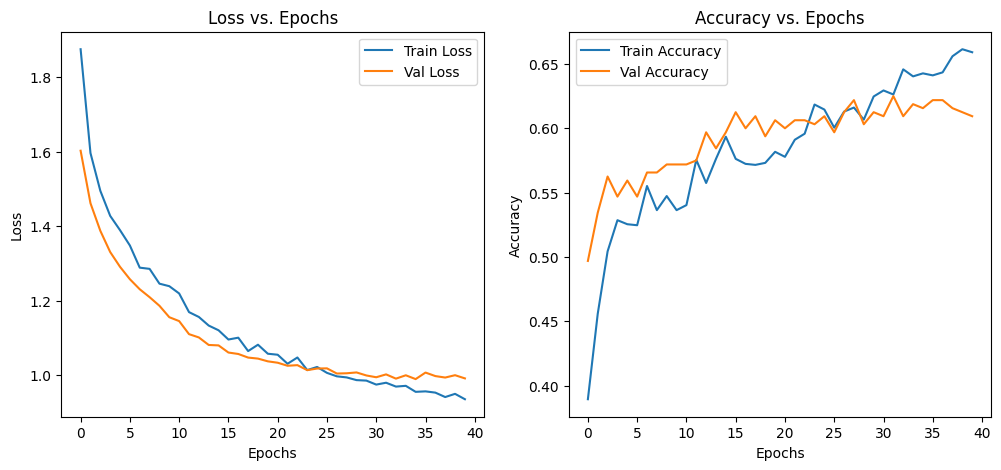

In [78]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

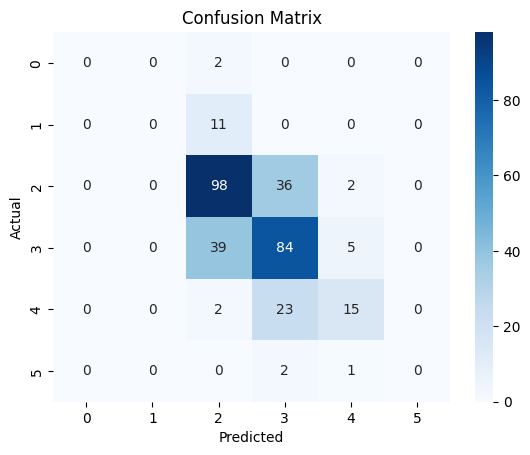

In [80]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
